In [2]:
__author__ = "Lola-Marie Moron, Sandra Fouzari, Danila Kilin"
__credits__ = ["Lola-Marie Moron", "Sandra Fouzari", "Danila Kilin"]
__version__ = "1.0.1"
__maintainer__ = "Lola-Marie Moron, Sandra Fouzari, Danila Kilin"
__email__ = "lola-marie.moron@edu.devinci.fr"
__status__ = "Development"

In [209]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.ticker as ticker

# Table of Contents
* [Première partie](#chapter1)
    * [Chargement des données](#section_1_1)
    * [Exploration de la donnée](#section_1_2)

# Première partie <a class="anchor" id="chapter1"></a>

## Chargement des données <a class="anchor" id="section_1_1"></a>

In [4]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [5]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [8]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [9]:
df.groupby('CAEC').agg(nb_values=('CAEC','count'))

,nb_values
CAEC,
Always,53
Frequently,242
Sometimes,1765
no,51


In [10]:
df.groupby('MTRANS').agg(nb_values=('MTRANS','count'))

,nb_values
MTRANS,
Automobile,457
Bike,7
Motorbike,11
Public_Transportation,1580
Walking,56


<AxesSubplot:xlabel='NObeyesdad'>

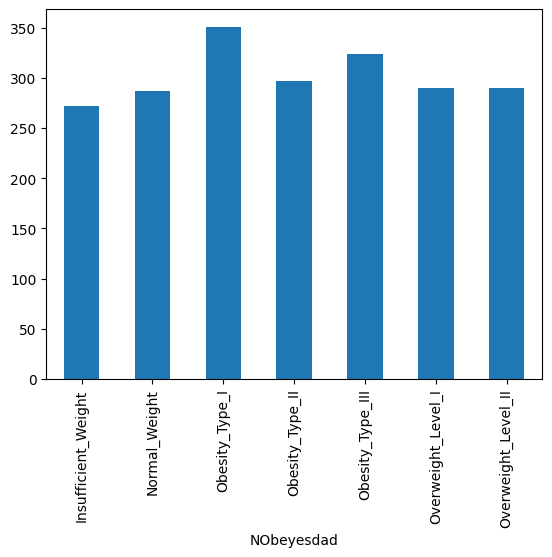

In [11]:
df_viz=df.groupby(['NObeyesdad']).size()
df_viz.plot(kind='bar')

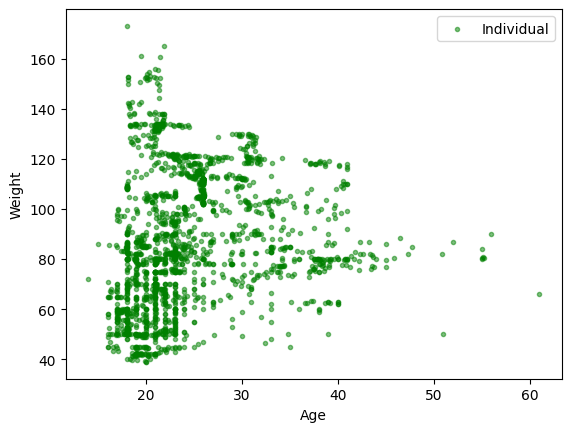

In [12]:
fig, ax = plt.subplots()
ax.scatter(df["Age"], df["Weight"], c="green", alpha=0.5, marker='.', label="Individual")
ax.set_xlabel("Age")
ax.set_ylabel("Weight")
ax.legend()
plt.show()

## Pre-processing

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
encoder = OneHotEncoder(sparse=False)

In [15]:
encoder.fit_transform(df[['MTRANS']])

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [16]:
encoder.categories_

[array(['Automobile', 'Bike', 'Motorbike', 'Public_Transportation',
        'Walking'], dtype=object)]

In [23]:
encoder.fit(df[['MTRANS']])

OneHotEncoder(sparse=False)

In [50]:
encoder_df = pd.DataFrame(encoder.fit_transform(df[['MTRANS']]))

In [51]:
encoder_df

,0,1,2,3,4
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
2106,0.0,0.0,0.0,1.0,0.0
2107,0.0,0.0,0.0,1.0,0.0
2108,0.0,0.0,0.0,1.0,0.0
2109,0.0,0.0,0.0,1.0,0.0


In [53]:
#rename encoder_df columns with MTRANS categories underscore encoder.categories_
encoder_df.columns = encoder.get_feature_names(['MTRANS'])

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [54]:
encoder_df

,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
2106,0.0,0.0,0.0,1.0,0.0
2107,0.0,0.0,0.0,1.0,0.0
2108,0.0,0.0,0.0,1.0,0.0
2109,0.0,0.0,0.0,1.0,0.0


In [55]:
#drop MTRANS column from df and concat encoder_df
df = df.drop('MTRANS', axis=1)
df = pd.concat([df, encoder_df], axis=1)

In [56]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,...,no,0.000000,1.000000,no,Normal_Weight,0.0,0.0,0.0,1.0,0.0
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,...,yes,3.000000,0.000000,Sometimes,Normal_Weight,0.0,0.0,0.0,1.0,0.0
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,...,no,2.000000,1.000000,Frequently,Normal_Weight,0.0,0.0,0.0,1.0,0.0
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,...,no,2.000000,0.000000,Frequently,Overweight_Level_I,0.0,0.0,0.0,0.0,1.0
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,...,no,0.000000,0.000000,Sometimes,Overweight_Level_II,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,...,no,1.676269,0.906247,Sometimes,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,...,no,1.341390,0.599270,Sometimes,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,...,no,1.414209,0.646288,Sometimes,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,...,no,1.139107,0.586035,Sometimes,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0


In [57]:
#do label encoding for CAEC column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df['CAEC'])
df['CAEC'] = label_encoder.transform(df['CAEC'])
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,2,no,...,no,0.000000,1.000000,no,Normal_Weight,0.0,0.0,0.0,1.0,0.0
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,2,yes,...,yes,3.000000,0.000000,Sometimes,Normal_Weight,0.0,0.0,0.0,1.0,0.0
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,2,no,...,no,2.000000,1.000000,Frequently,Normal_Weight,0.0,0.0,0.0,1.0,0.0
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,2,no,...,no,2.000000,0.000000,Frequently,Overweight_Level_I,0.0,0.0,0.0,0.0,1.0
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,2,no,...,no,0.000000,0.000000,Sometimes,Overweight_Level_II,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,2,no,...,no,1.676269,0.906247,Sometimes,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,2,no,...,no,1.341390,0.599270,Sometimes,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,2,no,...,no,1.414209,0.646288,Sometimes,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,2,no,...,no,1.139107,0.586035,Sometimes,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0


In [66]:
print(label_encoder.classes_)
label_encoder.inverse_transform(np.array([0,1,2,3]))

['Always' 'Frequently' 'Sometimes' 'no']


array(['Always', 'Frequently', 'Sometimes', 'no'], dtype=object)

In [68]:
label_encoder = LabelEncoder()
label_encoder.fit(df['CALC'])
df['CALC'] = label_encoder.transform(df['CALC'])
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,2,no,...,no,0.000000,1.000000,3,Normal_Weight,0.0,0.0,0.0,1.0,0.0
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,2,yes,...,yes,3.000000,0.000000,2,Normal_Weight,0.0,0.0,0.0,1.0,0.0
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,2,no,...,no,2.000000,1.000000,1,Normal_Weight,0.0,0.0,0.0,1.0,0.0
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,2,no,...,no,2.000000,0.000000,1,Overweight_Level_I,0.0,0.0,0.0,0.0,1.0
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,2,no,...,no,0.000000,0.000000,2,Overweight_Level_II,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,2,no,...,no,1.676269,0.906247,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,2,no,...,no,1.341390,0.599270,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,2,no,...,no,1.414209,0.646288,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,2,no,...,no,1.139107,0.586035,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0


In [69]:
print(label_encoder.classes_)
label_encoder.inverse_transform(np.array([0,1,2,3]))

['Always' 'Frequently' 'Sometimes' 'no']


array(['Always', 'Frequently', 'Sometimes', 'no'], dtype=object)

In [70]:
label_encoder = LabelEncoder()
label_encoder.fit(df['Gender'])
df['Gender'] = label_encoder.transform(df['Gender'])
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.000000,1.620000,64.000000,yes,no,2.0,3.0,2,no,...,no,0.000000,1.000000,3,Normal_Weight,0.0,0.0,0.0,1.0,0.0
1,0,21.000000,1.520000,56.000000,yes,no,3.0,3.0,2,yes,...,yes,3.000000,0.000000,2,Normal_Weight,0.0,0.0,0.0,1.0,0.0
2,1,23.000000,1.800000,77.000000,yes,no,2.0,3.0,2,no,...,no,2.000000,1.000000,1,Normal_Weight,0.0,0.0,0.0,1.0,0.0
3,1,27.000000,1.800000,87.000000,no,no,3.0,3.0,2,no,...,no,2.000000,0.000000,1,Overweight_Level_I,0.0,0.0,0.0,0.0,1.0
4,1,22.000000,1.780000,89.800000,no,no,2.0,1.0,2,no,...,no,0.000000,0.000000,2,Overweight_Level_II,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,2,no,...,no,1.676269,0.906247,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2107,0,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,2,no,...,no,1.341390,0.599270,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2108,0,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,2,no,...,no,1.414209,0.646288,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2109,0,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,2,no,...,no,1.139107,0.586035,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0


In [73]:
print(label_encoder.classes_)
label_encoder.inverse_transform(np.array([0,1]))

['Female' 'Male']


array(['Female', 'Male'], dtype=object)

In [74]:
label_encoder = LabelEncoder()
label_encoder.fit(df['family_history_with_overweight'])
df['family_history_with_overweight'] = label_encoder.transform(df['family_history_with_overweight'])
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.000000,1.620000,64.000000,1,no,2.0,3.0,2,no,...,no,0.000000,1.000000,3,Normal_Weight,0.0,0.0,0.0,1.0,0.0
1,0,21.000000,1.520000,56.000000,1,no,3.0,3.0,2,yes,...,yes,3.000000,0.000000,2,Normal_Weight,0.0,0.0,0.0,1.0,0.0
2,1,23.000000,1.800000,77.000000,1,no,2.0,3.0,2,no,...,no,2.000000,1.000000,1,Normal_Weight,0.0,0.0,0.0,1.0,0.0
3,1,27.000000,1.800000,87.000000,0,no,3.0,3.0,2,no,...,no,2.000000,0.000000,1,Overweight_Level_I,0.0,0.0,0.0,0.0,1.0
4,1,22.000000,1.780000,89.800000,0,no,2.0,1.0,2,no,...,no,0.000000,0.000000,2,Overweight_Level_II,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,yes,3.0,3.0,2,no,...,no,1.676269,0.906247,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2107,0,21.982942,1.748584,133.742943,1,yes,3.0,3.0,2,no,...,no,1.341390,0.599270,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2108,0,22.524036,1.752206,133.689352,1,yes,3.0,3.0,2,no,...,no,1.414209,0.646288,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2109,0,24.361936,1.739450,133.346641,1,yes,3.0,3.0,2,no,...,no,1.139107,0.586035,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0


In [75]:
print(label_encoder.classes_)
label_encoder.inverse_transform(np.array([0,1]))

['no' 'yes']


array(['no', 'yes'], dtype=object)

In [76]:
label_encoder = LabelEncoder()
label_encoder.fit(df['FAVC'])
df['FAVC'] = label_encoder.transform(df['FAVC'])
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,no,...,no,0.000000,1.000000,3,Normal_Weight,0.0,0.0,0.0,1.0,0.0
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,yes,...,yes,3.000000,0.000000,2,Normal_Weight,0.0,0.0,0.0,1.0,0.0
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,no,...,no,2.000000,1.000000,1,Normal_Weight,0.0,0.0,0.0,1.0,0.0
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,no,...,no,2.000000,0.000000,1,Overweight_Level_I,0.0,0.0,0.0,0.0,1.0
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,no,...,no,0.000000,0.000000,2,Overweight_Level_II,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,no,...,no,1.676269,0.906247,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,no,...,no,1.341390,0.599270,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,no,...,no,1.414209,0.646288,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,no,...,no,1.139107,0.586035,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0


In [77]:
print(label_encoder.classes_)
label_encoder.inverse_transform(np.array([0,1]))

['no' 'yes']


array(['no', 'yes'], dtype=object)

In [78]:
label_encoder = LabelEncoder()
label_encoder.fit(df['SMOKE'])
df['SMOKE'] = label_encoder.transform(df['SMOKE'])
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,...,no,0.000000,1.000000,3,Normal_Weight,0.0,0.0,0.0,1.0,0.0
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,...,yes,3.000000,0.000000,2,Normal_Weight,0.0,0.0,0.0,1.0,0.0
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,...,no,2.000000,1.000000,1,Normal_Weight,0.0,0.0,0.0,1.0,0.0
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,...,no,2.000000,0.000000,1,Overweight_Level_I,0.0,0.0,0.0,0.0,1.0
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,...,no,0.000000,0.000000,2,Overweight_Level_II,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,...,no,1.676269,0.906247,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,...,no,1.341390,0.599270,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,...,no,1.414209,0.646288,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,...,no,1.139107,0.586035,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0


In [80]:
print(label_encoder.classes_)
label_encoder.inverse_transform(np.array([0,1]))

['no' 'yes']


array(['no', 'yes'], dtype=object)

In [81]:
label_encoder = LabelEncoder()
label_encoder.fit(df['SCC'])
df['SCC'] = label_encoder.transform(df['SCC'])
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,...,0,0.000000,1.000000,3,Normal_Weight,0.0,0.0,0.0,1.0,0.0
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,...,1,3.000000,0.000000,2,Normal_Weight,0.0,0.0,0.0,1.0,0.0
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,...,0,2.000000,1.000000,1,Normal_Weight,0.0,0.0,0.0,1.0,0.0
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,...,0,2.000000,0.000000,1,Overweight_Level_I,0.0,0.0,0.0,0.0,1.0
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,...,0,0.000000,0.000000,2,Overweight_Level_II,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,...,0,1.676269,0.906247,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,...,0,1.341390,0.599270,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,...,0,1.414209,0.646288,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,...,0,1.139107,0.586035,2,Obesity_Type_III,0.0,0.0,0.0,1.0,0.0


In [82]:
print(label_encoder.classes_)
label_encoder.inverse_transform(np.array([0,1]))

['no' 'yes']


array(['no', 'yes'], dtype=object)

In [83]:
#split data into X and y
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [130]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1477, 20)
(634, 20)
(1477,)
(634,)


In [149]:
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
1930,0,25.982113,1.627818,105.428628,1,1,3.000000,3.000000,2,0,1.480750,0,0.098043,0.663492,2,0.0,0.0,0.0,1.0,0.0
1803,0,26.000000,1.656320,111.933010,1,1,3.000000,3.000000,2,0,2.774014,0,0.000000,0.138418,2,0.0,0.0,0.0,1.0,0.0
1198,1,18.000000,1.750097,86.372141,1,1,2.907062,3.000000,2,0,2.740848,0,1.219827,0.037634,2,0.0,0.0,0.0,1.0,0.0
15,0,22.000000,1.700000,66.000000,1,0,3.000000,3.000000,0,0,2.000000,1,2.000000,1.000000,2,0.0,0.0,0.0,1.0,0.0
816,1,23.451595,1.670227,75.000000,1,1,2.000000,3.000000,2,0,2.000000,0,0.129163,1.983678,2,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1,32.290160,1.754956,120.098812,1,1,2.967300,3.000000,2,0,2.530035,0,0.955317,1.339232,2,1.0,0.0,0.0,0.0,0.0
1095,1,23.000000,1.718981,81.669950,1,1,2.000000,1.729553,2,0,1.400247,0,0.887923,1.011983,2,0.0,0.0,0.0,1.0,0.0
1130,0,22.989846,1.650000,80.000000,1,1,2.000000,3.000000,2,0,2.000000,0,0.146919,2.000000,3,0.0,0.0,0.0,1.0,0.0
1294,0,23.000000,1.628168,84.497980,1,1,2.058687,2.962004,2,0,2.010596,0,0.851059,0.630866,3,0.0,0.0,0.0,1.0,0.0


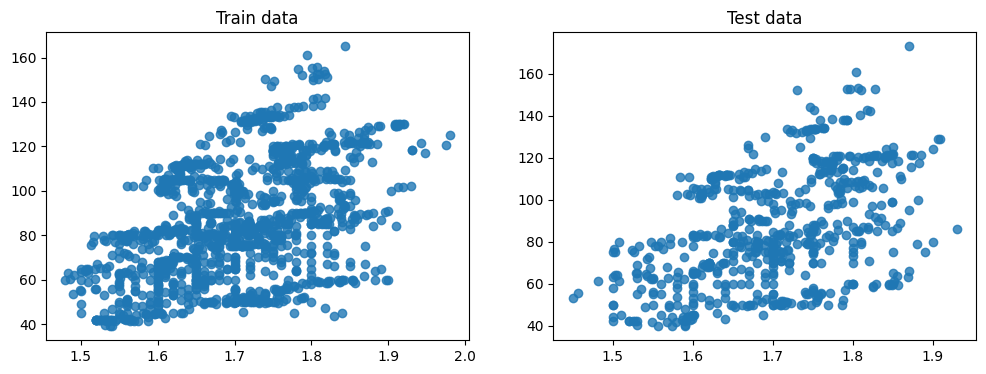

In [152]:
#visualize the train and test data on scatter subplot
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train.Height, X_train.Weight, alpha=0.8)
plt.title('Train data')
plt.subplot(122)
plt.scatter(X_test.Height, X_test.Weight, alpha=0.8)
plt.title('Test data')
plt.show()

In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 # Il ne faut fiter que sur les data d'entrainement
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  # apply same transformation to test data

In [95]:
#min max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy').mean()

0.7846862116353641

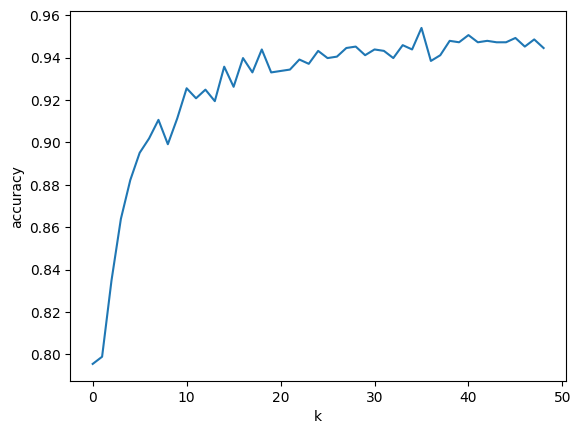

In [136]:
val_score = []
for i in range(1, 50):
    knn = RandomForestClassifier(n_estimators=i)
    score = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()
    val_score.append(score)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(val_score)

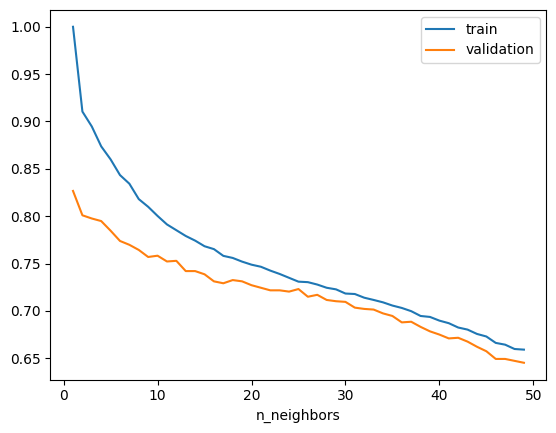

In [139]:
#validation curve
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 50)
train_scores, val_scores = validation_curve(KNeighborsClassifier(), X_train, y_train, param_name="n_neighbors", param_range=param_range, cv=5)

plt.plot(param_range, np.mean(train_scores, axis=1), label="train")
plt.plot(param_range, np.mean(val_scores, axis=1), label="validation")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [123]:
models = []
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))

#evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)
    names.append(name)
    msg = "%s: %f" % (name, accuracy)
    print(msg)
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

#compare algorithms
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()





LR: 0.858044
0.8580441640378549
[[85  1  0  0  0  0  0]
 [17 55  0  0  0 16  5]
 [ 0  0 91  8  0  0  3]
 [ 0  0  2 86  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0 10  0  0  0 65 13]
 [ 0  0  4  0  0 10 65]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.83      0.99      0.90        86
      Normal_Weight       0.83      0.59      0.69        93
     Obesity_Type_I       0.94      0.89      0.91       102
    Obesity_Type_II       0.91      0.98      0.94        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.71      0.74      0.73        88
Overweight_Level_II       0.76      0.82      0.79        79

           accuracy                           0.86       634
          macro avg       0.85      0.86      0.85       634
       weighted avg       0.86      0.86      0.85       634

KNN: 0.805994
0.805993690851735
[[79  4  0  0  0  2  1]
 [21 46  7  5  0  6  8]
 [ 1  2 88  7  0  2  2]
 [ 0  0  2 85  0  1  

In [129]:
#search for best parameters for KNN model
# from sklearn.model_selection import GridSearchCV

# print('KNN')

# k_range = list(range(1, 31))
# weight_options = ['uniform', 'distance']
# param_grid = dict(n_neighbors=k_range, weights=weight_options)

# grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
# grid.fit(X, y)

# print(grid.best_score_)
# print(grid.best_params_)
# print(grid.best_estimator_)
#0.741
#{'n_neighbors': 1, 'weights': 'uniform'}
#KNeighborsClassifier(n_neighbors=1)

#search for best parameters for SVM model

# print('SVM')

# C_range = list(range(1, 31))
# kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']
# param_grid = dict(C=C_range, kernel=kernel_options)

# grid = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy')
# grid.fit(X, y)

# print(grid.best_score_)
# print(grid.best_params_)
# print(grid.best_estimator_)
# #0.741
# #{'C': 1, 'kernel': 'linear'}
# #SVC(C=1, kernel='linear')

#search for best parameters for Random Forest model

print('Random Forest')

n_estimators_range = list(range(1, 20))
max_depth_range = list(range(1, 31))
param_grid = dict(n_estimators=n_estimators_range, max_depth=max_depth_range)

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
#0.741
#{'max_depth': 1, 'n_estimators': 1}
#RandomForestClassifier(max_depth=1, n_estimators=1)

#search for best parameters for Decision Tree model

print('Decision Tree')

max_depth_range = list(range(1, 31))
param_grid = dict(max_depth=max_depth_range)

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
#0.741
#{'max_depth': 1}
#DecisionTreeClassifier(max_depth=1)

#search for best parameters for Logistic Regression model

print('Logistic Regression')

C_range = list(range(1, 20))
param_grid = dict(C=C_range)

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
#0.741
#{'C': 1}
#LogisticRegression(C=1)



Random Forest
0.9304404333747887
{'max_depth': 24, 'n_estimators': 19}
RandomForestClassifier(max_depth=24, n_estimators=19)
Decision Tree
0.9280337915812353
{'max_depth': 21}
DecisionTreeClassifier(max_depth=21)
Logistic Regression


/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.6741330823613771
{'C': 9}
LogisticRegression(C=9)


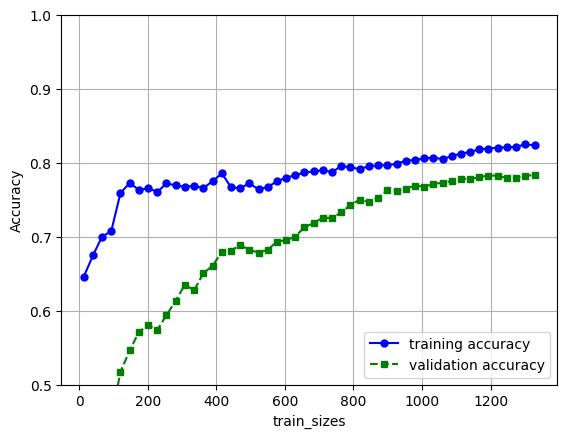

In [103]:
#learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

plt.plot(train_sizes, train_scores.mean(axis=1), color='blue', marker='o', markersize=5, label='training accuracy')
plt.plot(train_sizes, val_scores.mean(axis=1), color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')

plt.grid()
plt.xlabel('train_sizes')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()

# Test of some algorithms

In [159]:
#Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy through cross-validation score : ", cross_val_score(model, X_train, y_train).mean())
print("Basic accuracy score : ", accuracy_score(y_test, y_pred))
print("Matrice de confusion \n", confusion_matrix(y_test, y_pred))
print("\nClassification report \n", classification_report(y_test, y_pred))


Accuracy through cross-validation score :  0.9546495648190563
Basic accuracy score :  0.9416403785488959
Matrice de confusion 
 [[82  4  0  0  0  0  0]
 [ 2 86  0  0  0  5  0]
 [ 0  3 97  2  0  0  0]
 [ 0  0  1 87  0  0  0]
 [ 0  0  1  0 97  0  0]
 [ 0 11  0  0  0 74  3]
 [ 0  2  0  0  0  3 74]]

Classification report 
                      precision    recall  f1-score   support

Insufficient_Weight       0.98      0.95      0.96        86
      Normal_Weight       0.81      0.92      0.86        93
     Obesity_Type_I       0.98      0.95      0.97       102
    Obesity_Type_II       0.98      0.99      0.98        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.90      0.84      0.87        88
Overweight_Level_II       0.96      0.94      0.95        79

           accuracy                           0.94       634
          macro avg       0.94      0.94      0.94       634
       weighted avg       0.94      0.94      0.94       634



In [169]:
#KNN
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy through cross-validation score : ", cross_val_score(model, X_train, y_train).mean())
print("Basic accuracy score : ", accuracy_score(y_test, y_pred))
print("Matrice de confusion \n", confusion_matrix(y_test, y_pred))
print("\nClassification report \n", classification_report(y_test, y_pred))

Accuracy through cross-validation score :  0.8442624828218049
Basic accuracy score :  0.8643533123028391
Matrice de confusion 
 [[84  2  0  0  0  0  0]
 [18 47  2  0  0 20  6]
 [ 0  0 95  4  1  1  1]
 [ 0  0  1 84  3  0  0]
 [ 0  0  0  0 98  0  0]
 [ 1  7  1  0  0 74  5]
 [ 0  2  9  0  0  2 66]]

Classification report 
                      precision    recall  f1-score   support

Insufficient_Weight       0.82      0.98      0.89        86
      Normal_Weight       0.81      0.51      0.62        93
     Obesity_Type_I       0.88      0.93      0.90       102
    Obesity_Type_II       0.95      0.95      0.95        88
   Obesity_Type_III       0.96      1.00      0.98        98
 Overweight_Level_I       0.76      0.84      0.80        88
Overweight_Level_II       0.85      0.84      0.84        79

           accuracy                           0.86       634
          macro avg       0.86      0.86      0.86       634
       weighted avg       0.86      0.86      0.86       634



# Tuning hyperparameters

## Random Forest

In [173]:
def test_hyperparametres(model, hyperparametres):
    grid = GridSearchCV(model, hyperparametres, n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"Best score: {grid.best_score_}")
    print(f"Best hyperparametres: {grid.best_params_}")
    print(f"Best estimator: {grid.best_estimator_}")
    return grid.best_score_, grid.best_params_, grid.best_estimator_

In [174]:
hyperparametres = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [7, 8, 9, 10],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
model = RandomForestClassifier()
test_hyperparametres(model, hyperparametres)

Best score: 0.9559894640403115
Best hyperparametres: {'bootstrap': True, 'max_depth': 90, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}
Best estimator: RandomForestClassifier(max_depth=90, max_features=10, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=200)


(0.9559894640403115,
 {'bootstrap': True,
  'max_depth': 90,
  'max_features': 10,
  'min_samples_leaf': 3,
  'min_samples_split': 10,
  'n_estimators': 200},
 RandomForestClassifier(max_depth=90, max_features=10, min_samples_leaf=3,
                        min_samples_split=10, n_estimators=200))

In [176]:
hyperparametres = {
    'bootstrap': [True],
    'max_depth': [60, 70, 80, 90],
    'max_features': [9, 10, 11],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [8, 9, 10, 11],
    'n_estimators': [100, 200, 400]
}
test_hyperparametres(model, hyperparametres)

Best score: 0.9607352267521758
Best hyperparametres: {'bootstrap': True, 'max_depth': 60, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 400}
Best estimator: RandomForestClassifier(max_depth=60, max_features=10, min_samples_leaf=2,
                       min_samples_split=8, n_estimators=400)


(0.9607352267521758,
 {'bootstrap': True,
  'max_depth': 60,
  'max_features': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 8,
  'n_estimators': 400},
 RandomForestClassifier(max_depth=60, max_features=10, min_samples_leaf=2,
                        min_samples_split=8, n_estimators=400))

In [177]:
hyperparametres = {
    'bootstrap': [True],
    'max_depth': [40, 50, 60, 70],
    'max_features': [9, 10, 11],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [6, 7, 8],
    'n_estimators': [200, 400, 600]
}
test_hyperparametres(model, hyperparametres)

Best score: 0.964111314704535
Best hyperparametres: {'bootstrap': True, 'max_depth': 50, 'max_features': 11, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}
Best estimator: RandomForestClassifier(max_depth=50, max_features=11, min_samples_split=6,
                       n_estimators=200)


(0.964111314704535,
 {'bootstrap': True,
  'max_depth': 50,
  'max_features': 11,
  'min_samples_leaf': 1,
  'min_samples_split': 6,
  'n_estimators': 200},
 RandomForestClassifier(max_depth=50, max_features=11, min_samples_split=6,
                        n_estimators=200))

In [178]:
hyperparametres = {
    'bootstrap': [True],
    'max_depth': [30, 40, 50, 60],
    'max_features': [9, 10, 11],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [5, 6, 7],
    'n_estimators': [100, 200, 400]
}
test_hyperparametres(model, hyperparametres)

Best score: 0.9681768208886853
Best hyperparametres: {'bootstrap': True, 'max_depth': 40, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best estimator: RandomForestClassifier(max_depth=40, max_features=10, min_samples_split=5)


(0.9681768208886853,
 {'bootstrap': True,
  'max_depth': 40,
  'max_features': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 100},
 RandomForestClassifier(max_depth=40, max_features=10, min_samples_split=5))

## KNN

In [179]:
hyperparametres = {
    'n_neighbors': [5, 10, 15, 20, 25, 30],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40]
}
model = KNeighborsClassifier()
test_hyperparametres(model, hyperparametres)

Best score: 0.8645716903344022
Best hyperparametres: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 5, 'weights': 'distance'}
Best estimator: KNeighborsClassifier(leaf_size=20, weights='distance')


(0.8645716903344022,
 {'algorithm': 'auto',
  'leaf_size': 20,
  'n_neighbors': 5,
  'weights': 'distance'},
 KNeighborsClassifier(leaf_size=20, weights='distance'))

In [182]:
hyperparametres = {
    'n_neighbors': [3, 5, 10, 15, 20, 25, 30],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30]
}
test_hyperparametres(model, hyperparametres)

Best score: 0.8740563444800733
Best hyperparametres: {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}
Best estimator: KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=3,
                     weights='distance')


(0.8740563444800733,
 {'algorithm': 'ball_tree',
  'leaf_size': 10,
  'n_neighbors': 3,
  'weights': 'distance'},
 KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=3,
                      weights='distance'))

In [183]:
hyperparametres = {
    'n_neighbors': [2, 3, 5, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [5, 10, 20]
}
test_hyperparametres(model, hyperparametres)

Best score: 0.895048098946404
Best hyperparametres: {'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 2, 'weights': 'distance'}
Best estimator: KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, n_neighbors=2,
                     weights='distance')


(0.895048098946404,
 {'algorithm': 'ball_tree',
  'leaf_size': 5,
  'n_neighbors': 2,
  'weights': 'distance'},
 KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, n_neighbors=2,
                      weights='distance'))

In [187]:
hyperparametres = {
    'n_neighbors': [1, 2, 3, 5],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [3, 5, 10]
}
test_hyperparametres(model, hyperparametres)

Best score: 0.895048098946404
Best hyperparametres: {'algorithm': 'ball_tree', 'leaf_size': 3, 'n_neighbors': 1, 'weights': 'uniform'}
Best estimator: KNeighborsClassifier(algorithm='ball_tree', leaf_size=3, n_neighbors=1)


(0.895048098946404,
 {'algorithm': 'ball_tree',
  'leaf_size': 3,
  'n_neighbors': 1,
  'weights': 'uniform'},
 KNeighborsClassifier(algorithm='ball_tree', leaf_size=3, n_neighbors=1))

# Test various classification algorithms

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR: 0.654574
LR: 0.666281
LDA: 0.884858
LDA: 0.894420
KNN: 0.864353
KNN: 0.856463
CART: 0.916404
CART: 0.939755
NB: 0.593060
NB: 0.564005
SVM: 0.574132
SVM: 0.549108
RF: 0.938486
RF: 0.953291
GB: 0.943218
GB: 0.958710
ET: 0.929022
ET: 0.932295
AB: 0.358044
AB: 0.330359
GBM: 0.941640
GBM: 0.959391


/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multi

MLP: 0.782334
MLP: 0.790154
XGB: 0.454259
XGB: 0.423920


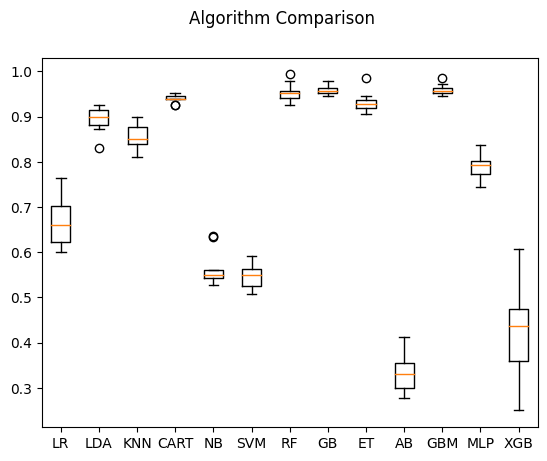

In [194]:
# list all classification models
from sklearn import linear_model
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import ensemble
from sklearn import discriminant_analysis
from sklearn import gaussian_process
from sklearn import tree
from sklearn import neural_network
from sklearn import model_selection
from sklearn import metrics

# list all classification models
def classification_models():
    models = []
    models.append(('LR', linear_model.LogisticRegression()))
    models.append(('LDA', discriminant_analysis.LinearDiscriminantAnalysis()))
    models.append(('KNN', neighbors.KNeighborsClassifier()))
    models.append(('CART', tree.DecisionTreeClassifier()))
    models.append(('NB', naive_bayes.GaussianNB()))
    models.append(('SVM', svm.SVC()))
    models.append(('RF', ensemble.RandomForestClassifier()))
    models.append(('GB', ensemble.GradientBoostingClassifier()))
    models.append(('ET', ensemble.ExtraTreesClassifier()))
    models.append(('AB', ensemble.AdaBoostClassifier()))
    models.append(('GBM', ensemble.GradientBoostingClassifier()))
    models.append(('MLP', neural_network.MLPClassifier()))
    models.append(('XGB', linear_model.SGDClassifier()))
    return models

# evaluate each model in turn
performances_scoring = {}
performances_scoring_crosval = []
names = []
best_algorithm = 0
best_algorithm_crossval = 0
best_perf = 0
best_perf_crossval = 0
scoring = 'accuracy'
for name, model in classification_models():
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    performances_scoring_crosval.append(cv_results)
    names.append(name)
    model.fit(X_train, y_train)
    performance = model.score(X_test, y_test)
    if cv_results.mean() >  best_perf_crossval:
            best_algorithm_crossval = model
            best_perf_crossval = cv_results.mean()
    if performance >  best_perf:
            best_algorithm = model
            best_perf = performance
    if 0<performance and performance<1:
        performances_scoring[name] = [performance]
    
    msg_crossvalidation = "%s: %f" % (name, cv_results.mean())
    msg = "%s: %f" % (name, performance)
    print(msg)
    print(msg_crossvalidation)
    print ("="*30)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(performances_scoring_crosval)
ax.set_xticklabels(names)
plt.show()


In [195]:
best_algorithm, best_perf

(GradientBoostingClassifier(), 0.943217665615142)

In [196]:
best_algorithm_crossval, best_perf_crossval

(GradientBoostingClassifier(), 0.9593905129619416)

# Comparaison des algorithmes

In [225]:
df_algorithms = pd.DataFrame(performances_scoring).T
col_name = "performance"
df_algorithms.columns = [col_name]
df_algorithms = df_algorithms.performance.sort_values()
df_algorithms

AB      0.358044
XGB     0.454259
SVM     0.574132
NB      0.593060
LR      0.654574
MLP     0.782334
KNN     0.864353
LDA     0.884858
CART    0.916404
ET      0.929022
RF      0.938486
GBM     0.941640
GB      0.943218
Name: performance, dtype: float64

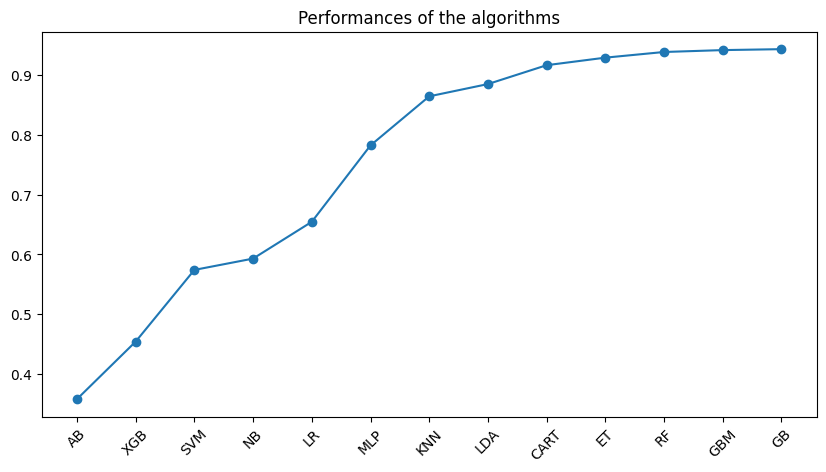

In [226]:
ax = df_algorithms.plot(figsize=(10, 5), title="Performances of the algorithms", rot=45, x_compat=True, marker="o")
ax.set_xticks(range(len(df_algorithms)))
ax.xaxis.set_ticklabels(df_algorithms.index)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

/var/folders/dp/v7br1gzx259bmsgljb9hv28r0000gn/T/ipykernel_1593/2219464027.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.xaxis.set_ticklabels(df_algorithms.index)


<AxesSubplot:>

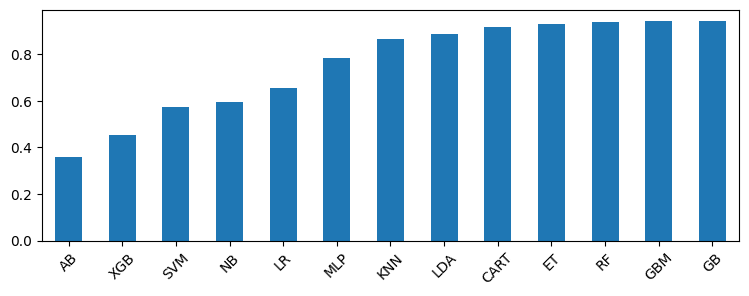

In [227]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(9,3)
axes.xaxis.set_ticklabels(df_algorithms.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df_algorithms.plot(kind='bar', rot=45, ax=axes)

# Tuning best model hyperparameters

In [230]:
hyperparametres = {
    'loss': ['log_loss', 'deviance', 'exponential'],
    'learning_rate': [10, 1, 0.1, 0.01, 0.001],
    'n_estimators': [10, 100, 1000],
    'subsample': [0.1, 0.5, 1.0],
    'criterion': ['friedman_mse', 'mse', 'square_error'],
    'max_features': ['auto', 'sqrt', 'log2', None],

}
model = ensemble.GradientBoostingClassifier()
test_hyperparametres(model, hyperparametres)